In [3]:
import autolens as al
import autolens.plot as aplt
%matplotlib inline

In [4]:
grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.1, sub_size=2
)

Given that superfluid dark matter can be approximated as a linear mass density for lensing. We run 2 experiments. In the first we assume that the lensing galaxies, mass_profile is a elliptical whoose axis ratio is very small so as to appear as a linear density. The second experiment follows the /simulators/imaging/lens_bulge_disk_ldm_dark__source_sersic.py /.

In [30]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, axis_ratio=0.1, phi=90.0
    ),
    light=al.lp.SphericalSersic(
        centre=(0.0, 0.0), intensity=2.0, effective_radius=0.5, sersic_index=2.5
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.EllipticalSersic(
        centre=(0.0, 0.0),
        axis_ratio=0.8,
        phi=45.0,
        intensity=1.0,
        effective_radius=3.0,
        sersic_index=2.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

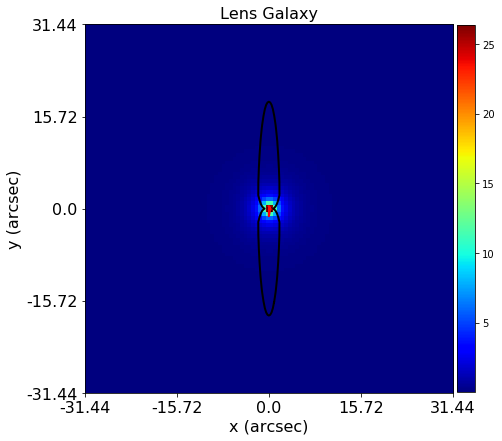

In [31]:
aplt.galaxy.profile_image(
    galaxy=lens_galaxy,
    grid=grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Lens Galaxy")),
)

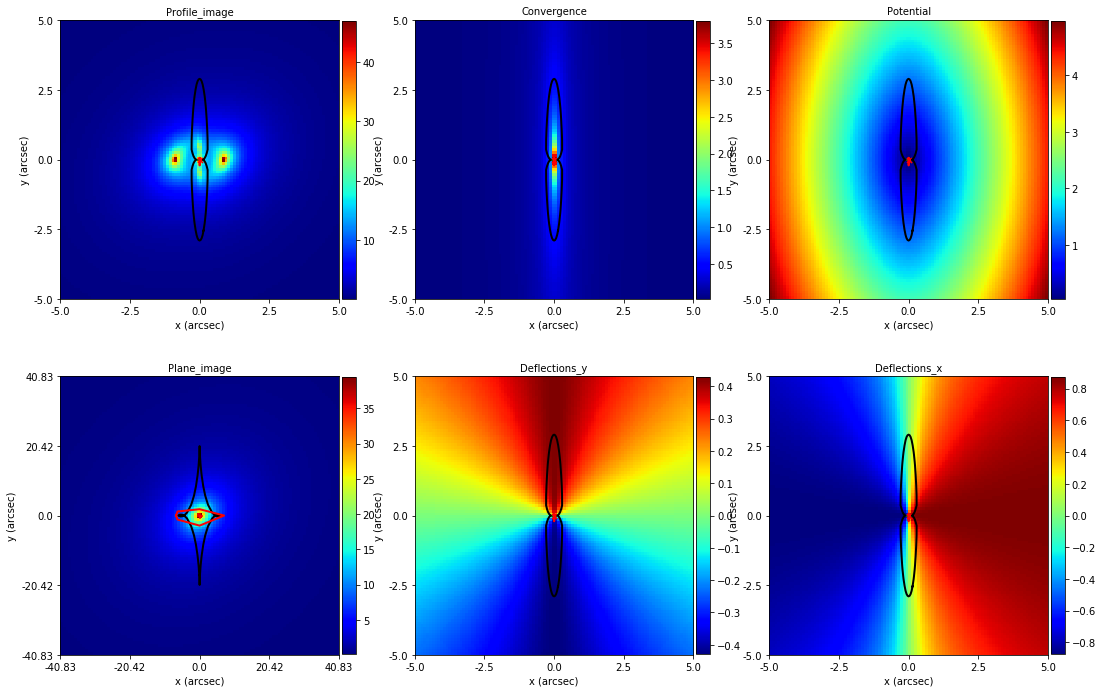

In [32]:
aplt.tracer.subplot_tracer(tracer=tracer, grid=grid)

Here we tried to observe the source galaxy by observing through a lens of galaxies whose mass profiles are almost linear(very thin ellipse).

In [33]:
# PSF stimulates the noise from the telescopes
psf = al.kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)
normal_image = tracer.profile_image_from_grid(grid=grid)
padded_image = tracer.padded_profile_image_from_grid_and_psf_shape(
    grid=grid, psf_shape_2d=psf.shape_2d
)

In [34]:
simulator = al.simulator.imaging(
    shape_2d=grid.shape_2d,
    pixel_scales=0.1,
    sub_size=grid.sub_size,
    exposure_time=300.0,
    psf=psf,
    background_level=0.1,
    add_noise=True,
)

imaging = simulator.from_tracer(tracer=tracer)

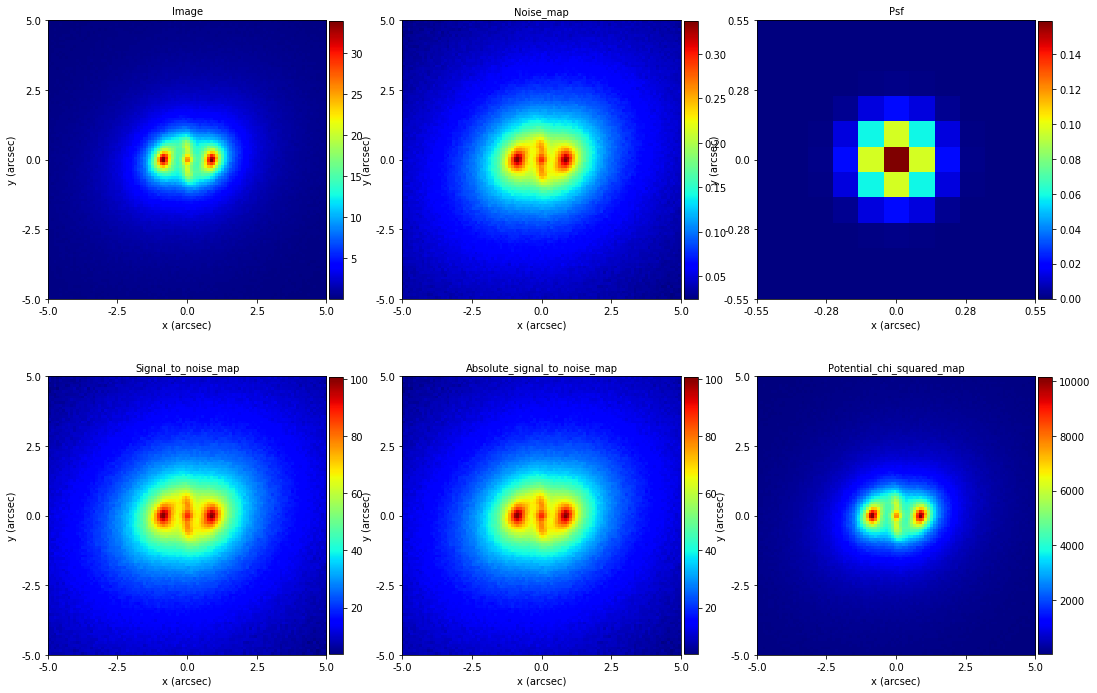

In [35]:
aplt.imaging.subplot_imaging(imaging=imaging)

Now we follow the steps mentioned in the simulator file. Its the same except the lens and source galaxy are defined slighlty differently

In [26]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    bulge=al.lmp.EllipticalSersic(
        centre=(0.0, 0.0),
        axis_ratio=0.8,
        phi=90.0,
        intensity=1.0,
        effective_radius=0.6,
        sersic_index=2.5,
        mass_to_light_ratio=0.1,
    ),
    disk=al.lmp.EllipticalExponential(
        centre=(0.0, 0.0),
        axis_ratio=0.6,
        phi=60.0,
        intensity=0.5,
        effective_radius=1.8,
        mass_to_light_ratio=0.4,
    ),
    mass=al.mp.SphericalNFW(centre=(0.0, 0.0), kappa_s=0.12, scale_radius=20.0),
    shear=al.mp.ExternalShear(magnitude=0.02, phi=145.0),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.EllipticalSersic(
        centre=(-0.05, -0.0),
        axis_ratio=0.9,
        phi=10.0,
        intensity=0.2,
        effective_radius=1.5,
        sersic_index=2.0,
    ),
)

# Use these galaxies to setup a tracer, which will generate the image for the simulated Imaging dataset.
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

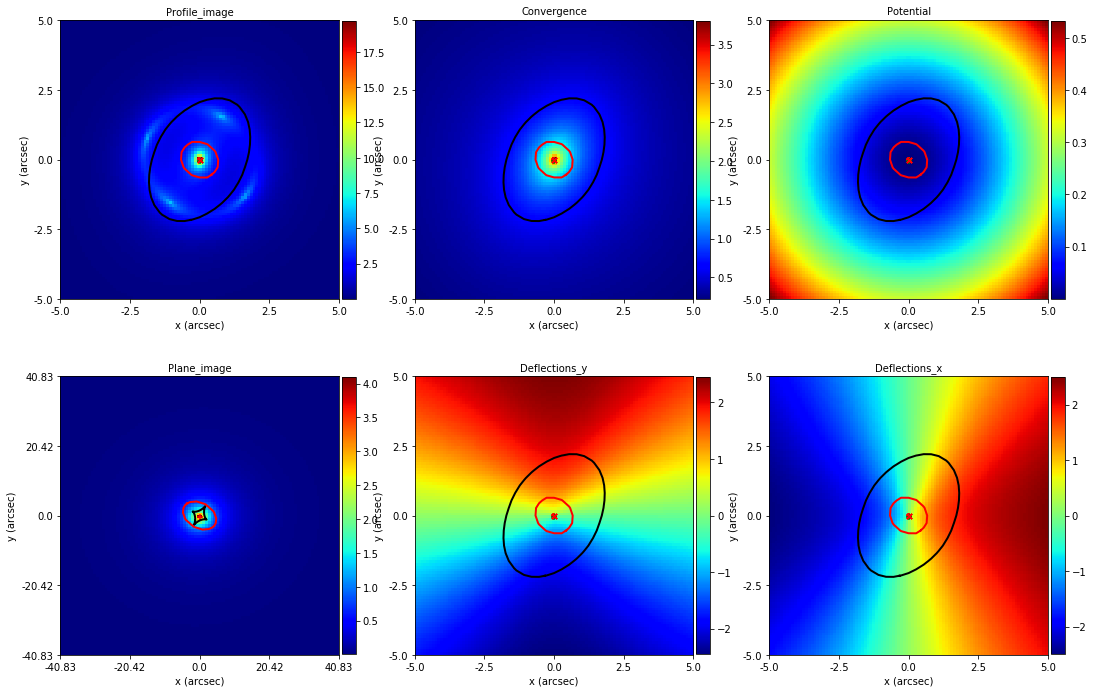

In [29]:
aplt.tracer.subplot_tracer(tracer=tracer, grid=simulator.grid)


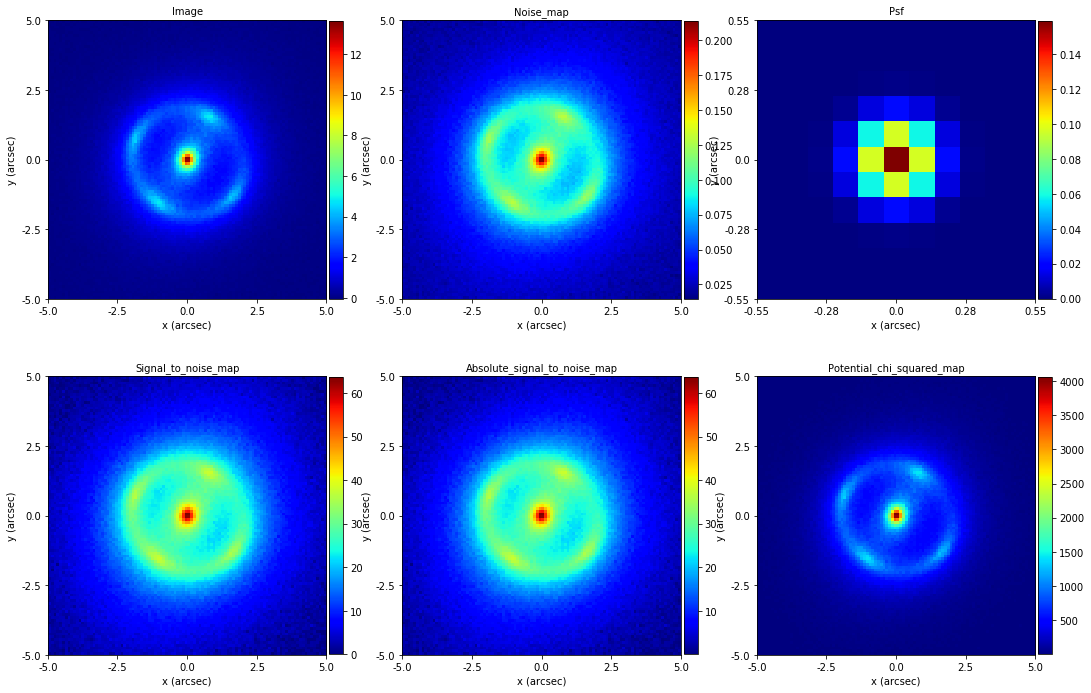

In [28]:
imaging = simulator.from_tracer(tracer=tracer)
aplt.imaging.subplot_imaging(imaging=imaging)